# WorkShop 4

It is the time to be a Machine Learning Engineer. Pay a lot of attention for instructions.

# Section 1

For this assignment, you will be using the _Breast Cancer Wisconsin_ (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).


In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

### Problem 1.1

_Scikit-learn_ works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a _DataFrame_ does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame. 


Convert the sklearn.dataset `cancer` to a DataFrame. 

_This function should return a_ `(569, 31)` _DataFrame with:_

```
columns = 
    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

index = RangeIndex(start=0, stop=569, step=1)
```

In [37]:
def answer_one() -> pd.DataFrame:
    """
    Converts the sklearn breast cancer dataset to a pandas DataFrame.
    
    Returns:
        pd.DataFrame: A DataFrame with shape (569, 31) containing the breast cancer data and the target.
    """
    # YOUR CODE HERE
    cancer_df= pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
    cancer_df['target'] = cancer.target

    return cancer_df

cancer_df= answer_one()
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [38]:
# space for professor tests

### Problem 1.2

What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

_This function should return a Series named `target` of length 2 with integer values and index =_ `['malignant', 'benign']`

In [39]:
def answer_two() -> pd.Series:
    """
    This function calculates how many instances of 'malignant' and 'benign' are in the dataset.
    
    Returns:
        pd.Series: A Series with the count of 'malignant' and 'benign' instances.
    """
    # YOUR CODE HERE
    cancer_df = answer_one()

    target_names = pd.Series(['malignant','benign'], index=[0,1])
    target = cancer_df['target'].map(target_names)

    class_distribution = target.value_counts()
    return class_distribution

In [40]:
# space for professor tests

### Problem 1.3

Split the DataFrame into `X` (the data) and `y` (the labels).

_This function should return a tuple of length 2: `(X, y)`, where:_

- _`X` has shape `(569, 30)`_
- _`y` has shape `(569,)`._

In [41]:
def answer_three() -> tuple[pd.DataFrame, pd.Series]:
    """
    This function separates the features and the target from the breast cancer dataset.
    
    Returns:
        Tuple[pd.DataFrame, pd.Series]: A tuple containing X with shape (569, 30) and y with shape (569,).
    """
    # YOUR CODE HERE
    cancer_df= answer_one()
    X = cancer_df.drop(columns='target')
    y = cancer_df['target']

    return X,y

In [42]:
# space for professor tests

### Problem 1.4

Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

__Set the random number generator state to 0 using `random_state=0` to make sure your results match the autograder!__

_This function should return a tuple of length 4: `(X_train, X_test, y_train, y_test)`, where:_

- _`X_train` has shape `(426, 30)`_
- _`X_test` has shape `(143, 30)`_
- _`y_train` has shape `(426,)`_
- _`y_test` has shape `(143,)`_

In [57]:
from sklearn.model_selection import train_test_split

def answer_four() -> tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
    """
    Uses train_test_split to create training and test sets from the features and target.
    
    Returns:
        Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]: A tuple containing
        X_train, X_test, y_train, and y_test with respective shapes (426, 30), (143, 30), (426,), and (143,).
    """
    # YOUR CODE HERE
    X,y = answer_three()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    return X_train, X_test, y_train, y_test

In [44]:
# space for professor tests

### Problem 1.5

Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

_This function should return a `sklearn.neighbors.classification.KNeighborsClassifier`._

In [45]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five() -> KNeighborsClassifier:
    """
    Fits a k-nearest neighbors (knn) classifier using X_train and y_train with n_neighbors=1.
    
    Returns:
        KNeighborsClassifier: A fitted k-nearest neighbors classifier.
    """
    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = answer_four()
    knn = KNeighborsClassifier(n_neighbors=1)

    knn.fit(X_train, y_train)

    return knn

In [46]:
# space for professor tests

### Problem 1.6

Using your __knn classifier__, predict the class label using the mean value for each feature.

___Hint:___ _You can use `cancer_df.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier)._

In [47]:
def answer_six() -> int:
    """
    Predicts the class label using the mean value for each feature.
    Uses the fitted knn classifier to predict the class label based on the mean value of each feature.
    
    Returns:
        int: The predicted class label (0 for malignant, 1 for benign).
    """
    # YOUR CODE HERE
    knn = answer_five()
    cancer_df = answer_one()
    mean_values = cancer_df.mean()[:-1].values.reshape(1,-1)
    prediction = knn.predict(mean_values)
    return prediction[0]

In [48]:
# space for professor tests

### Problem 1.7

Using your __knn classifier__, predict the class labels for the test set `X_test`.

_This function should return a numpy array with shape `(143,)` and values either `0.0` or `1.0`._

In [59]:
def answer_seven() -> np.ndarray:
    """
    Predicts the class labels for the test set X_test using the knn classifier.
    Uses the fitted knn classifier to predict the class labels for X_test.
    
    Returns:
        np.ndarray: An array with shape (143,) containing the predicted class labels (0 or 1).
    """
    # YOUR CODE HERE
    knn = answer_five()
    X_train, X_test, y_train, y_test = answer_four()
    prediction = knn.predict(X_test)
    return prediction

In [50]:
# space for professor tests

### Problem 1.8

Find the score (_mean accuracy_) of your __knn classifier__ using `X_test` and `y_test`.

_This function should return a float between $0$ and $1$._

In [61]:
def answer_eight() -> float:
    """
    Calculates the mean accuracy of the knn classifier using X_test and y_test.
    Uses the fitted knn classifier to calculate the accuracy score for X_test and y_test.
    
    Returns:
        float: The mean accuracy score of the knn classifier.
    """
    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    score = knn.score(X_test, y_test)
    return score

0.916083916083916


In [52]:
# space for professor tests

### Problem 1.9

Using the plotting function below to visualize the different predicition scores between _train_ and _test sets_, as well as malignant and benign cells.

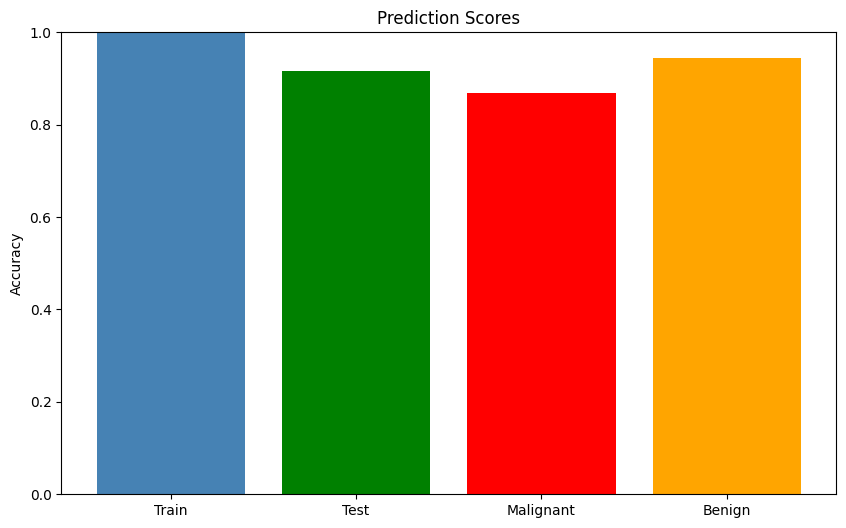

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

def answer_nine():
    """
    Visualizes the different prediction scores between train and test sets, 
    as well as malignant and benign cells using the fitted knn classifier.
    """
    
    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_accuracy = np.mean(y_train_pred == y_train)
    test_accuracy = np.mean(y_test_pred == y_test)

    malignant = X_test[y_test == 0]
    benign = X_test[y_test == 1]

    malignant_pred = knn.predict(malignant)
    benign_pred = knn.predict(benign)
    
    malignant_accuracy = np.mean(malignant_pred == 0)
    benign_accuracy = np.mean(benign_pred == 1)

    plt.figure(figsize=(10, 6))
    
    categories = ['Train', 'Test', 'Malignant', 'Benign']
    accuracies = [train_accuracy, test_accuracy, malignant_accuracy, benign_accuracy]
    
    plt.bar(categories, accuracies, color=['steelblue', 'green', 'red', 'orange'])
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.title('Prediction Scores')
    plt.show()

answer_nine()

## Section 2

In this case, you are going to use a _.csv_ dataset to evaluate some performance.

In [68]:
# depencencies
import numpy as np
import pandas as pd

### Problem 2.1

Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

_This function should return a float between $0$ and $1$._

In [69]:
def answer_eleven() -> float:
    """
    Calculates the percentage of fraud instances in the dataset.
    
    Returns:
        float: The percentage of fraud instances in the dataset, between 0 and 1.
    """
    # YOUR CODE HERE
    df = pd.read_csv('assets/fraud_data.csv')
    fraud_percentage = df['Class'].mean()
    return fraud_percentage

print(answer_eleven())

0.016410823768035772


In [ ]:
# space for professor tests

In [70]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

cancer_df= pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Problem 2.2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

_This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`._

In [71]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, accuracy_score

def answer_twelve() -> tuple[float, float]:
    """
    Trains a dummy classifier that classifies everything as the majority class of the training data.
    Calculates the accuracy and recall of this classifier.
    
    Returns:
        Tuple[float, float]: The accuracy score and recall score of the dummy classifier.
    """
    # YOUR CODE HERE
    dummy_clf = DummyClassifier(strategy='most_frequent')
    dummy_clf.fit(X_train, y_train)
    y_hat = dummy_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_hat)
    recall = recall_score(y_test, y_hat)

    return accuracy, recall
print(answer_twelve())

(0.6293706293706294, 1.0)


In [ ]:
# space for professor tests

### Problem 2.3

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a _XGBoost_ classifer using the default parameters. What is the accuracy, recall, precision, and F1 Score of this classifier?

_This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score, f1 score)`._

In [72]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from xgboost import XGBClassifier

def answer_thirteen() -> tuple[float, float, float, float]:
    """
    Trains an XGBoost classifier using the training data and evaluates it using the test data.
    Calculates the accuracy, recall, precision, and F1 score of the classifier.
    
    Returns:
        Tuple[float, float, float, float]: The accuracy score, recall score, precision score, and F1 score of the classifier.
    """
    # YOUR CODE HERE
    xgb_clf = XGBClassifier()
    
    xgb_clf.fit(X_train, y_train)
    y_hat = xgb_clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_hat)
    recall = recall_score(y_test, y_hat)
    precision = precision_score(y_test, y_hat)
    f1 = f1_score(y_test, y_hat)
    
    return accuracy, recall, precision, f1
print(answer_thirteen())

(0.972027972027972, 0.9666666666666667, 0.9886363636363636, 0.9775280898876404)


In [ ]:
# space for professor tests